# Imports

In [1]:
import os
import numpy as np
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Loading the Dataframes

In [2]:
def load_dataframe(df_path):
    if os.path.exists(df_path):
        df = pd.read_pickle(df_path)
        print("Loaded dataframe!")
    elif not os.path.exists(df_path):
        print("Result directory not found! Please check the path.")

    return df

In [3]:
score_list = []

In [4]:
df = pd.DataFrame(score_list, columns=["Input Prompt", "Grammar", "Creativity", "Consistency", "Age Group"])

In [5]:
baseline_dfpath = '/kaggle/input/compare-dataframes-v2/rating_df_baseline-21.pkl'
custom_dfpath = '/kaggle/input/compare-dataframes-v2/rating_df_custom-21.pkl'

In [6]:
df_baseline = load_dataframe(baseline_dfpath)

Loaded dataframe!


In [7]:
df_custom = load_dataframe(custom_dfpath)

Loaded dataframe!


# Average Scores by Criteria

In [8]:
# Calculate mean and standard deviation for both models
baseline_means = df_baseline[["Grammar", "Creativity", "Consistency"]].mean()
custom_means = df_custom[["Grammar", "Creativity", "Consistency"]].mean()

baseline_std = df_baseline[["Grammar", "Creativity", "Consistency"]].std()
custom_std = df_custom[["Grammar", "Creativity", "Consistency"]].std()

# Display means and standard deviations for easy comparison
comparison_df = pd.DataFrame({
    "Baseline Mean": baseline_means,
    "Custom Model Mean": custom_means,
    "Baseline Std Dev": baseline_std,
    "Custom Model Std Dev": custom_std
})
print(comparison_df)

             Baseline Mean  Custom Model Mean  Baseline Std Dev  \
Grammar               3.12               1.93          1.007848   
Creativity            2.26               1.21          1.060017   
Consistency           2.70               1.43          1.087115   

             Custom Model Std Dev  
Grammar                  1.199790  
Creativity               0.782317  
Consistency              0.923924  


# Statistical Tests

In [9]:
# Perform paired t-tests for each criterion
for criterion in ["Grammar", "Creativity", "Consistency"]:
    t_stat, p_val = ttest_rel(df_baseline[criterion], df_custom[criterion])
    print(f"{criterion} - t-statistic: {t_stat}, p-value: {p_val}")

Grammar - t-statistic: 7.527893882423187, p-value: 2.4274279939630423e-11
Creativity - t-statistic: 8.090474158783465, p-value: 1.535698427804945e-12
Consistency - t-statistic: 8.941727126333179, p-value: 2.2181272935465704e-14


# Age Group Distribution

In [10]:
# Count occurrences of each age group in both dataframes
age_group_baseline = df_baseline["Age Group"].value_counts(normalize=True)
age_group_custom = df_custom["Age Group"].value_counts(normalize=True)

# Combine into a single DataFrame for easier comparison
age_group_df = pd.DataFrame({
    "Baseline": age_group_baseline,
    "Custom Model": age_group_custom
}).fillna(0)
print(age_group_df)

                 Baseline  Custom Model
Age Group                              
A                    0.00          0.07
A (3 or under)       0.03          0.30
A (3 or under).      0.00          0.01
B                    0.02          0.07
B (4-5)              0.51          0.37
C                    0.08          0.02
C (6-7)              0.34          0.11
D (8-9)              0.01          0.00
DNF                  0.01          0.05


# Plots

## Bar Plot of Mean Scores

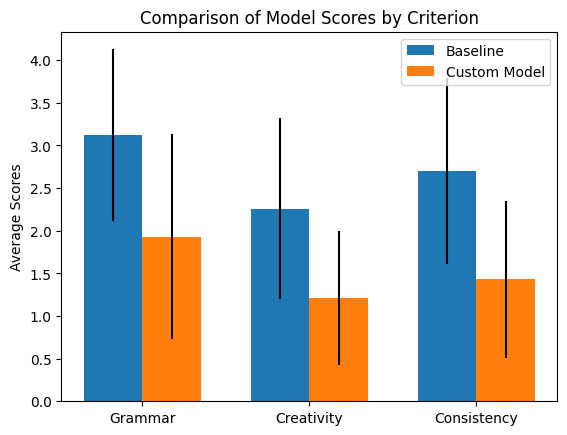

In [11]:
criteria = ["Grammar", "Creativity", "Consistency"]
x = np.arange(len(criteria))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, baseline_means, width, label='Baseline', yerr=baseline_std)
ax.bar(x + width/2, custom_means, width, label='Custom Model', yerr=custom_std)

ax.set_ylabel('Average Scores')
ax.set_title('Comparison of Model Scores by Criterion')
ax.set_xticks(x)
ax.set_xticklabels(criteria)
ax.legend()

plt.show()

## Box Plots for Score Distributions

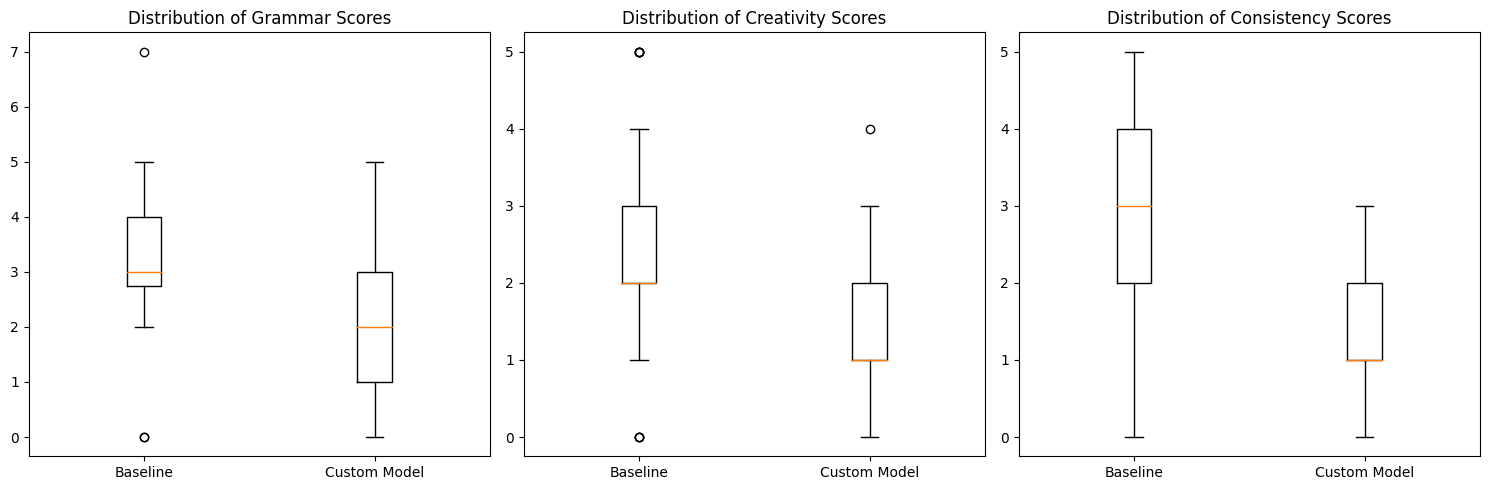

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, criterion in enumerate(criteria):
    axes[i].boxplot([df_baseline[criterion], df_custom[criterion]], labels=['Baseline', 'Custom Model'])
    axes[i].set_title(f'Distribution of {criterion} Scores')
plt.tight_layout()
plt.show()

## Stacked Bar Plot for Age Group Distribution

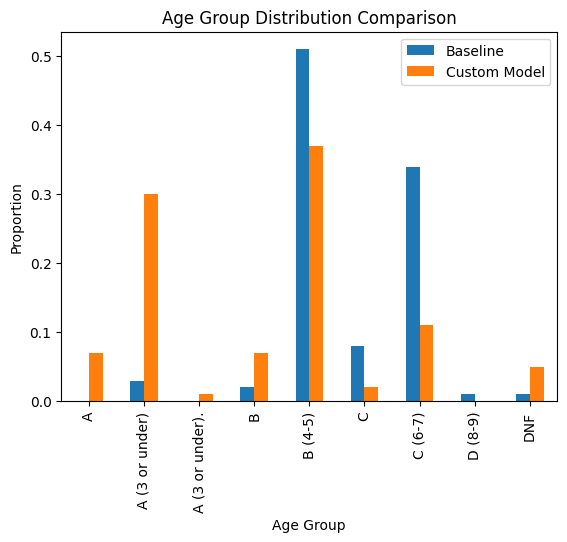

In [15]:
age_group_df.plot(kind="bar", stacked=False)
plt.title("Age Group Distribution Comparison")
plt.ylabel("Proportion")
plt.show()

## Radar Chart

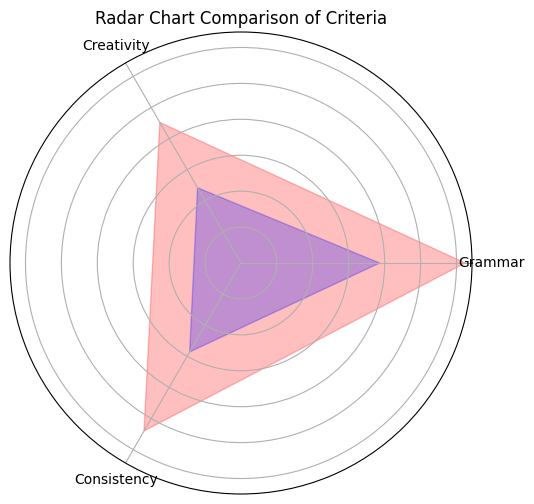

In [14]:
labels = criteria
baseline_values = baseline_means.values
custom_values = custom_means.values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

baseline_values = np.concatenate((baseline_values, [baseline_values[0]]))
custom_values = np.concatenate((custom_values, [custom_values[0]]))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, baseline_values, color='red', alpha=0.25)
ax.fill(angles, custom_values, color='blue', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Radar Chart Comparison of Criteria")
plt.show()